<a href="https://colab.research.google.com/github/RJ-Stony/Roh_Library/blob/main/Spotify_%ED%99%9C%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 나눔 고딕 설정

In [ ]:
# 설치 후 런타임 다시 시작
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic')

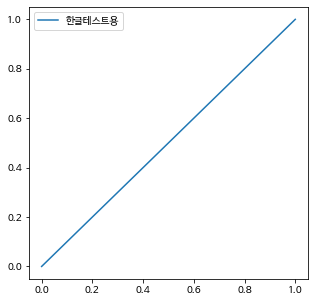

In [ ]:
plt.figure(figsize=(5,5))
plt.plot([0,1], [0,1], label='한글테스트용')
plt.legend()
plt.show()

## 실제 사용 부분

In [ ]:
pip install spotipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.1 MB/s 
     |████████████████████████████████| 138 kB 19.8 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials 
import pprint 

class Spotify_audio_features: 
  def __init__(self): 
    # initial setting 
    cid = 'cid' 
    secret = 'secret'

    client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 
    self.sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

  def get_features(self, artist, song):

    # get artist id information
    artist_info = self.sp.search(q=artist, type='artist')

    # get track id information
    track_info = self.sp.search(q=song, type='track')

    # get audio analysis information
    # audio_anal = self.sp.audio_analysis(track_id)

    for artists_id in artist_info["artists"]["items"]:
      artist_id = artists_id["id"]
      for tracks_id in track_info["tracks"]["items"]:
        track_id = tracks_id["id"]
        track_artist = tracks_id["artists"]
        track_artist_id = track_artist[0]["id"]

          # get audio_feature
        if artist_id == track_artist_id:
          features = self.sp.audio_features(tracks=[track_id])
          danceability = features[0]["danceability"]
          energy = features[0]["energy"]
          key = features[0]["key"]
          loudness = features[0]["loudness"]
          mode = features[0]["mode"]
          tempo = features[0]["tempo"]
          valence = features[0]["valence"]

          result = {"춤추기 적합도" : danceability,
                    "에너지" : energy,
                    "키" : key,
                    "음원 데시벨" : loudness,
                    "단조(0), 장조(1)" : mode,
                    "최대 템포" : tempo,
                    "음원의 밝음 정도" : valence}
          
          return result

        else:
          print("곡을 찾는 중입니다...")

가수명을 입력해주세요 : 아이유
곡명을 입력해주세요 : 너의 의미

곡을 찾는 중입니다...


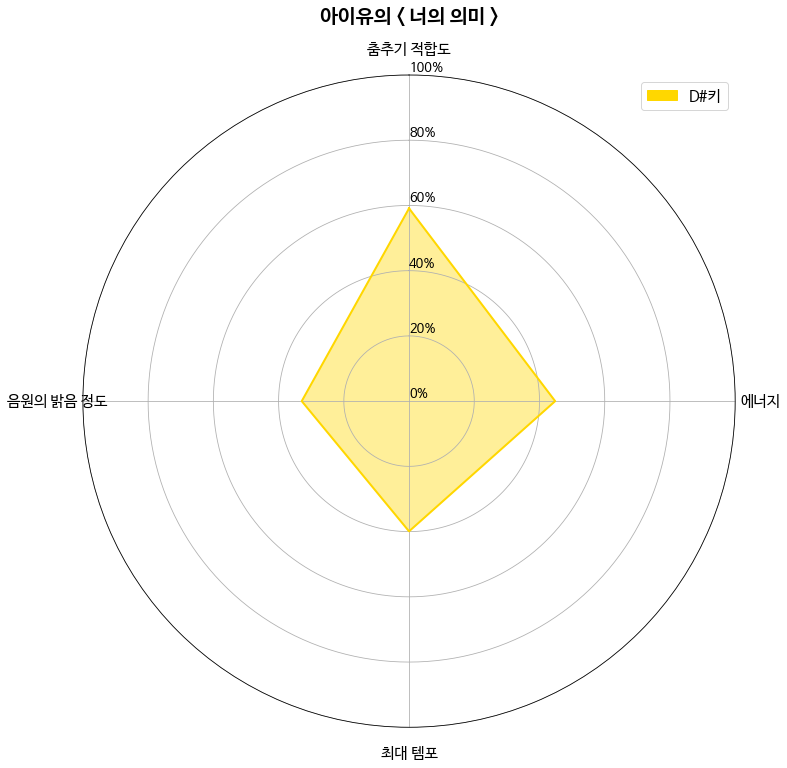

In [ ]:
import matplotlib 
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np

from math import pi
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D
from pandas.core import frame

import matplotlib.patches as mpatches # 범례 그리기 위한 라이브러리
import matplotlib.lines as mlines # 범례 그리기 위한 라이브러리

music = Spotify_audio_features()
artist_name = input("가수명을 입력해주세요 : ")
song_title = input("곡명을 입력해주세요 : ")

print("")

feat = music.get_features(artist_name, song_title)

if feat is None:
  print("아직 등록되지 않은 곡입니다!")

else:
  df = pd.DataFrame({
      "가수명": [artist_name],
      "곡명": [song_title],
      "춤추기 적합도": [feat["춤추기 적합도"]],
      "에너지": [feat["에너지"]],
      "최대 템포": [feat["최대 템포"] / 200],
      "음원의 밝음 정도": [feat["음원의 밝음 정도"]]
  })

  plt.rc('font', family='NanumBarunGothic')
  labels = df.columns[2:]
  num_labels = len(labels)
  
  angles = [x/float(num_labels)*(2*pi) for x in range(num_labels)]
  angles += angles[:1]
  
  # color depending on the mode (major or minor)
  if feat["키"] == 0:
    color = "lightcoral"
    label = "C키"
  elif feat["키"] == 1: 
    color = "coral"
    label = "C#키"
  elif feat["키"] == 2: 
    color = "darkorange"
    label = "D키"
  elif feat["키"] == 3: 
    color = "gold"
    label = "D#키"
  elif feat["키"] == 4: 
    color = "lightgreen"
    label = "E키"
  elif feat["키"] == 5: 
    color = "limegreen"
    label = "F키"
  elif feat["키"] == 6: 
    color = "forestgreen"
    label = "F#키"
  elif feat["키"] == 7: 
    color = "paleturquoise"
    label = "G키"
  elif feat["키"] == 8: 
    color = "turquoise"
    label = "G#키"
  elif feat["키"] == 9: 
    color = "steelblue"
    label = "A키"
  elif feat["키"] == 10: 
    color = "darkblue"
    label = "A#키"
  else:
    color = "blueviolet"
    label = "B키"
  
  variable = mpatches.Patch(color=color, label=label)
  
  fig = plt.figure(figsize=(12,12))
  fig.set_facecolor('white')
  
  for i, row in df.iterrows(): 
    data = df.iloc[i].drop(["가수명", "곡명"]).tolist()
    data += data[:1] 
  
    # generate graphs
    ax = plt.subplot(1, 1, i+1, polar=True)
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
  
    plt.xticks(angles[:-1], labels, fontsize=15)
    ax.tick_params(axis='x', which='major', pad=15)
  
    ax.set_rlabel_position(0)
    plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], ['0%', '20%', '40%', '60%', '80%', '100%'], fontsize=13)
    plt.ylim(0, 1)
  
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, data, color=color, alpha=0.4)
  
    title_font = {
      'fontsize': 20,
      'fontweight': 'bold'
    }
  
    plt.legend(handles=[variable], fontsize = 15)
    plt.title(artist_name + "의 < " + song_title + " >", fontdict=title_font, pad=20)
  
  plt.savefig(artist_name + "의 " + song_title + ".png")
  plt.show()